In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Iris = pd.read_csv('/content/drive/MyDrive/ML Data/Iris.csv')

In [ ]:
data_np = np.array(Iris.iloc[:,1:].to_dict('split')['data'])
np.random.shuffle(data_np)
train = data_np.T[:-1].T
train_result = data_np.T[-1]
train_result[train_result=="Iris-setosa"] = 0
train_result[train_result=="Iris-versicolor"] = 1
train_result[train_result=="Iris-virginica"] = 2
train_result=train_result.reshape(-1,1)
length = data_np.shape[0]
length8=int(length*0.8)

train_result_sample = []
for item in train_result:
  lst = list([0,0,0])
  lst[int(item)] = 1
  train_result_sample.append(lst)
train_result_sample = np.array(train_result_sample)
train=train.astype(float)
max = train.max(axis=0)
min = train.min(axis=0)
# for i in range(len(train)):
#   for j in range(len(train[i])):
#     train[i,j] = ((train[i,j]-min[j])/(max[j]-min[j]))
# train = ((train-min)/max-min)
X_train = train[:length8].astype(float)
X_test = train[length8:].astype(float)
y_train = train_result_sample[:length8].astype(float)
y_test = train_result_sample[length8:].astype(float)

In [ ]:
def sigmoid(x, der=False):
  if(der):
    return x*(1-x)
  a = np.exp(-x)
  return 1.0/ (1.0 + a)

def mse(y,y_pred, der=False):
  if(der):
    return y_pred*(y_pred-y)
  return 0.5*(y_pred-y)**2

In [ ]:
class Layer:
  def __init__(self, size, input = None, activation=sigmoid):
    self.activation=activation
    self.input = input
    self.weight = np.random.uniform(-1,1,size)
    self.bias = np.random.uniform(-1,1);
    self.output = None
  def calc_output(self, input):
    self.input = input
    self.output = self.activation(self.input.dot(self.weight) + self.bias)

0.006222035330560593

Confusion matrix
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



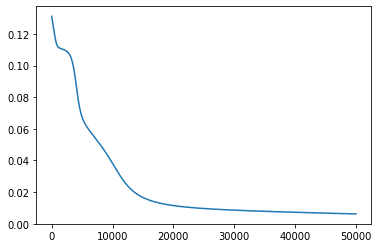

In [ ]:
# lr = learning rate
# activation = activation function where default use sigmoid activation function

class ANN:
  def __init__(self, X_train, y_train, lr, activation=sigmoid ):
    self.layers = []
    self.X_train = X_train
    self.y_train = y_train
    self.lr = lr
    self.activation = activation

  # adding layer
  def addLayer(self,nb_nurons, activation=sigmoid):
    if(len(self.layers) == 0):
      self.layers.append(Layer((self.X_train.shape[1],nb_nurons),self.X_train, activation))
    else:
      last_layer = self.layers[-1]
      self.layers.append(Layer((last_layer.weight.shape[1],nb_nurons),last_layer.output, activation))

  # train
  def train(self, epochs=10000):      
    errors = []
    if(len(self.layers) == 0):
      print("No layers added ")
      return errors 
    for i in range(epochs):
      self.forward_prop()
      self.backword_prop()
      errors.append(np.mean(mse(self.y_train,self.layers[-1].output)))
    return errors

  def forward_prop(self):   
    previous_value = self.X_train
    for layer in self.layers:
      layer.calc_output(previous_value)
      previous_value = layer.output

  def backword_prop(self):
    last_layer = previous_layer = self.layers[-1]
    der = mse(self.y_train, last_layer.output, der=True) * previous_layer.activation(last_layer.output, der=True)
    last_layer.weight -= self.lr * last_layer.input.T.dot(der)
    last_layer.bias -= self.lr * np.mean(der)
    for layer in np.flip(self.layers, axis=0)[1:]:
      der = der.dot(previous_layer.weight.T) * previous_layer.activation(layer.output, der=True)
      layer.weight-=self.lr * layer.input.T.dot(der) 
      layer.bias -= self.lr * np.mean(der)
      previous_layer = layer

  def predict(self, X_test):
    previous_value=X_test
    for layer in self.layers:
      layer.calc_output(previous_value)
      previous_value = layer.output
    return previous_value


train = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
train_result = np.array([0,1,1,0]).reshape((-1,1))

ann = ANN(X_train, y_train, lr=0.001)
ann.addLayer(10)
ann.addLayer(5)
ann.addLayer(3)
errors = ann.train(epochs=50000)
plt.plot(errors)
print(errors[-1])
y_test_after = np.argmax(y_test, axis=1)
y_predict = np.argmax(ann.predict(X_test), axis=1)

from sklearn.metrics import confusion_matrix
print('\nConfusion matrix')
print(confusion_matrix(y_test_after, y_predict))

from sklearn.metrics import classification_report
print('\nClassification Report')
print(classification_report(y_test_after, y_predict))  